In [1]:
# data load 등을 위한 chdir
import os
os.chdir("../introduction_to_ml_with_python-master/")

# graph 출력을 위한 기본설정
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고 문구 출력 방지를 위한 설정
import warnings
warnings.filterwarnings(action='ignore')

# basic packages import
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터를 다운로드하기 위한 변수 및 메서드 정의
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    pass # fetch_housing_data method

# 데이터를 다운로드하는 메서드 실행
fetch_housing_data()

In [3]:
import pandas as pd

# 데이터 셋의 경로 설정
csv_path = os.path.join(HOUSING_PATH, 'housing.csv')

# 데이터 셋을 dataframe으로 load
df_housing = pd.read_csv(csv_path)

In [4]:
# 데이터 셋 확인
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# 데이터 셋의 정보 확인
df_housing.info()

# '''
# total_bedrooms는 결측치가 있음.
# ocean_proximity는 object type의 변수임.
# '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# object type 변수의 값 확인
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# 데이터 셋 정보 확인
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


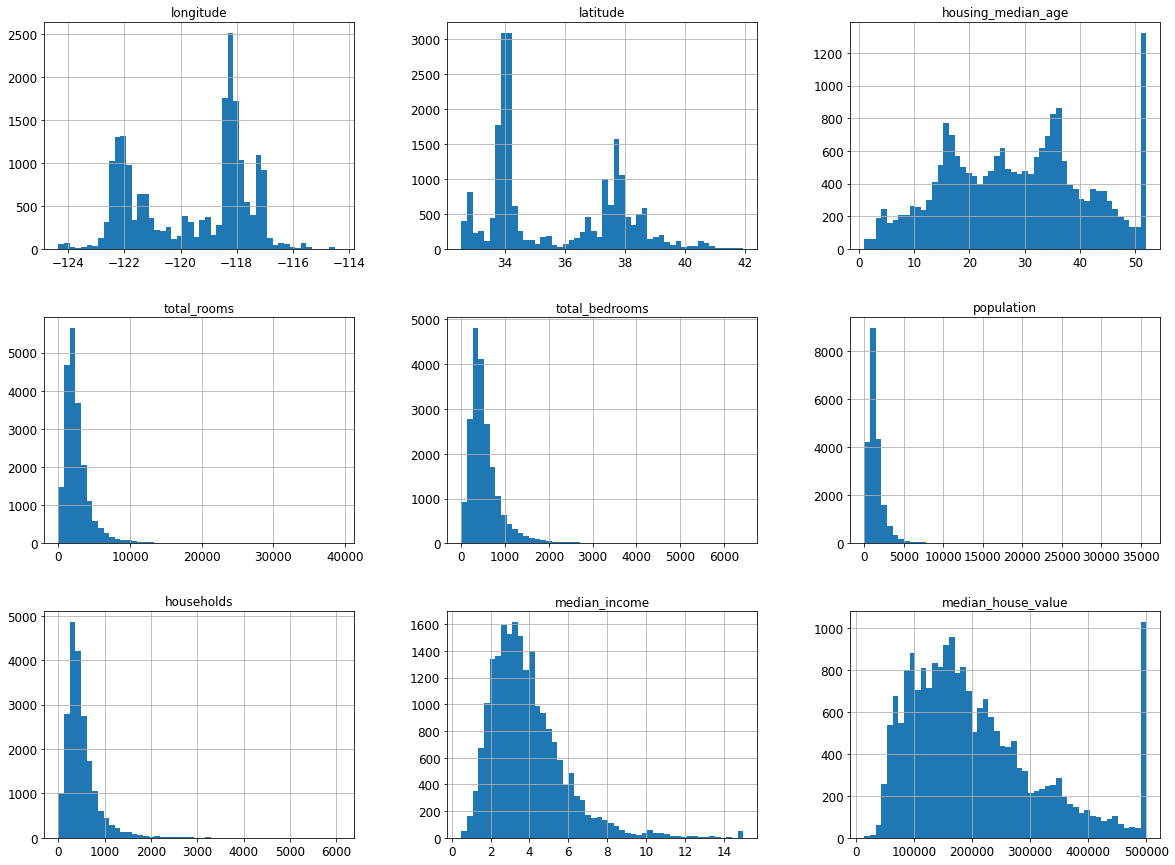

In [8]:
# 데이터 셋 그래프로 시각화하기
df_housing.hist(bins=50, figsize=(20, 15))
plt.show()

# '''
# housing_median_age, median_house_value는 맥시멈 값이 정해져 있음.
# 전체적으로 좌측으로 치우친 종 모양임.
# '''

In [9]:
# 실행 결과가 동일하도록 random seed 고정
np.random.seed(42)

In [10]:
# sklearn의 train_test_split 메서드를 함수로 구현해보기
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

# 메서드를 활용해 train과 test 데이터 셋을 8:2로 분리함.
train_set_full, test_set_full = split_train_test(df_housing, 0.2)

# train과 test 데이터 셋의 크기 확인
print('train:{}, test:{}'.format(len(train_set_full), len(test_set_full)))

train:16512, test:4128


In [11]:
# sklearn의 train_test_split 메서드 사용
from sklearn.model_selection import train_test_split

train_set_full, test_set_full = train_test_split(df_housing, test_size=0.2, random_state=42)

# train과 test 데이터 셋의 크기 확인
print('train:{}, test:{}'.format(len(train_set_full), len(test_set_full)))

train:16512, test:4128


In [12]:
# train_set 확인
train_set_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<AxesSubplot:>

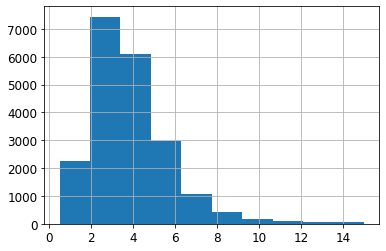

In [13]:
# 중요한 변수가 train과 test에 고르게 분포되어 있는지 확인하기 전 한 변수의 분포 확인
df_housing['median_income'].hist()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


<AxesSubplot:>

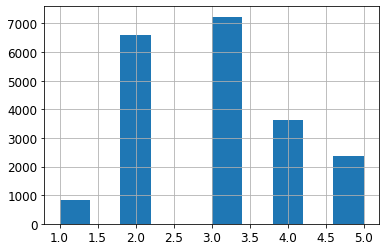

In [14]:
# 간편하게 확인하기 위해, 변수를 범주화 한 파생변수 생성
df_housing['income_cat'] = pd.cut(df_housing['median_income'],
                                 bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels = [1, 2, 3, 4, 5])

# 파생변수의 값을 통해 분포 확인
print(df_housing['income_cat'].value_counts())

# 그래프를 통해 파생변수의 분포 확인
df_housing['income_cat'].hist()

# '''
# 이 방법을 통해서 좌측으로 치우쳤던 분포가 종모양 형태로 변화함.
# '''

In [15]:
# StratifiedShuffleSplit 객체를 이용해 범주형 변수의 비율을 동일하게 분류
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit 객체 생성
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# StratifiedShuffleSplit 객체를 이용한 split 작업
for train_index, test_index in split.split(df_housing, df_housing['income_cat']) :
    strat_train_set_full = df_housing.loc[train_index]
    strat_test_set_full = df_housing.loc[test_index]
    pass # loop StratifiedShuffleSplit

In [16]:
# train과 test 데이터 셋의 income_cat 변수가 고르게 분포되었나 확인
print('train\n', strat_train_set_full['income_cat'].value_counts() / len(strat_train_set_full))
print('-------------')
print('test\n', strat_test_set_full['income_cat'].value_counts() / len(strat_test_set_full))

train
 3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
-------------
test
 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [17]:
# sklearn의 train_test_split의 매개변수를 통해 고르게 income변수를 고르게 분포
strat_train_set_full, strat_test_set_full = \
    train_test_split(df_housing, test_size=0.2, random_state=42, stratify=df_housing['income_cat'])

# train과 test 데이터 셋의 income_cat 변수가 고르게 분포되었나 확인
print('train\n', strat_train_set_full['income_cat'].value_counts() / len(strat_train_set_full))
print('-------------')
print('test\n', strat_test_set_full['income_cat'].value_counts() / len(strat_test_set_full))

train
 3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
-------------
test
 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [18]:
# 확인을 위해 사용했던 파생변수 삭제
for set_ in (strat_train_set_full, strat_test_set_full) :
    set_.drop('income_cat', axis=1, inplace=True)

## 데이터 이해를 위한 탐색과 시각화

In [19]:
# 원본에 손상이 가지 않도록 데이터를 copy
train_copy = strat_train_set_full.copy()

# 두 데이터 셋이 동일한지 확인
print(train_copy == strat_train_set_full)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606       True      True                True         True            True   
18632       True      True                True         True            True   
14650       True      True                True         True            True   
3230        True      True                True         True            True   
3555        True      True                True         True            True   
...          ...       ...                 ...          ...             ...   
6563        True      True                True         True            True   
12053       True      True                True         True            True   
13908       True      True                True         True            True   
11159       True      True                True         True            True   
15775       True      True                True         True            True   

       population  households  median_income  media

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

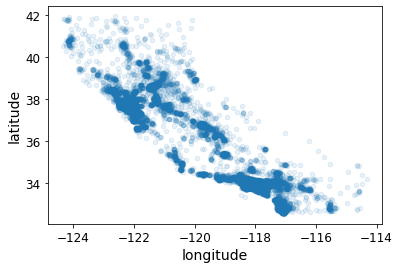

In [20]:
# scatter plot으로 위경도의 분포 확인
train_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

# plot함수는 내부적으로 matplotlib을 사용하므로 아래의 코드도 동일하게 작동함.
# train_copy.scatter(x='longitude', y='latitude', alpha=0.1)
# plt.scatter(train_copy['longitude'], train_copy['latitude'], alpha=0.1)

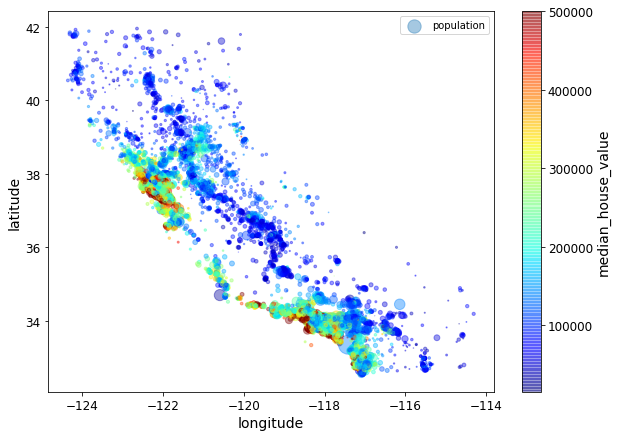

In [21]:
# 여러 정보를 추가하여 시각화
# 인구가 많은 지역은 원이 크게 나오도록 설정
# jet color map을 활용하여 중위 소득이 높은 곳은 붉게 표시되도록 설정
# x축이 잘 표시될 수 있도록 sharex 매개변수는 False로 설정

train_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
               s=train_copy['population']/100, label='population', figsize=(10, 7),
               c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
               sharex=False)
plt.legend()

In [22]:
# 캘리포니아 지도 이미지를 다운로드 받기
images_path = os.path.join('.', "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f69e3bb0048>)

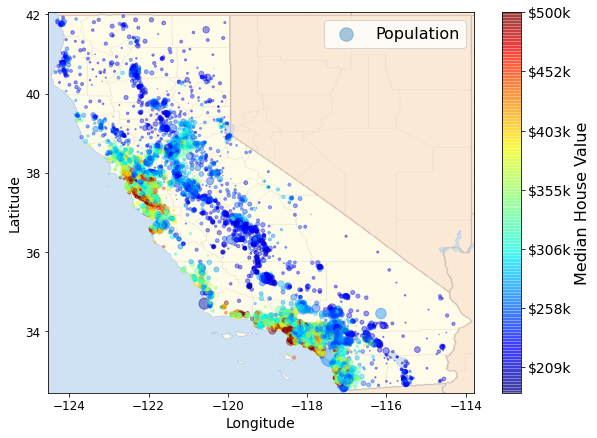

In [23]:
# 캘리포니아 지도에 그래프 표현
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(images_path, filename))

ax = train_copy.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=train_copy['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                    )

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train_copy["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [24]:
# 변수간의 상관관계를 확인하기 위해 상관행렬도를 변수에 저장
corr_matrix = train_copy.corr()

In [25]:
# 타겟 값인 median_house_value를 기준으로 상관계수 확인
corr_matrix['median_house_value'].sort_values(ascending=False)

# '''
# median_income 변수와 높은 상관관계가 있음을 확인함.
# 다른 변수가 무의미하다고 단정지을 수 없음.
# 상관계수는 선형적인 정보만 파악할 수 있고, 영향력을 확인할 수는 없기 때문임.
# '''

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

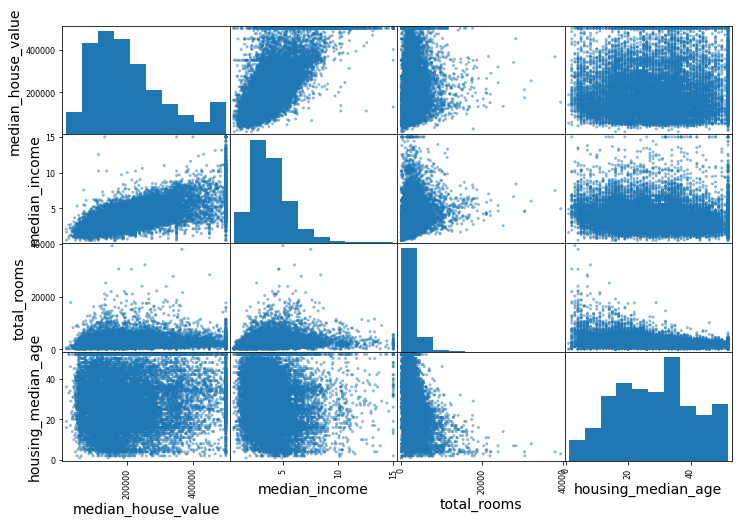

In [26]:
# 산점도 행렬을 통해 타겟과 일부 변수간의 관계 시각화
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']
scatter_matrix(train_copy[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

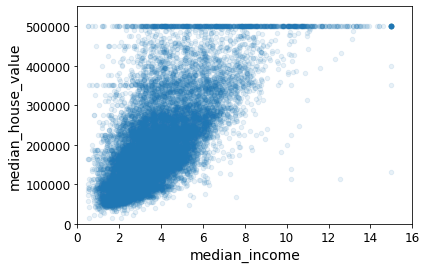

In [27]:
# median_income이 주요해 보이므로, 단독으로 산점도 확인
train_copy.plot(kind='scatter', x='median_income', y='median_house_value',
               alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [28]:
# 지역 전체의 방 / 지역의 주택 수로 주택 별 방의 갯수를 파생변수로 생성
train_copy['rooms_per_household'] = train_copy['total_rooms'] / train_copy['households']

# 지역 전체의 화장실 / 지역의 주택 수로 주택 별 화장실의 갯수를 파생변수로 생성
train_copy['bedrooms_per_room'] = train_copy['total_bedrooms'] / train_copy['total_rooms']

# 지역 전체의 방 / 지역의 주택 수로 주택 별 인구수를 파생변수로 생성
train_copy['population_per_household'] = train_copy['population'] / train_copy['households']

In [29]:
# 파생변수를 포함하여 상관행렬도 생성
corr_matrix = train_copy.corr()

# 타겟을 기준으로 상관계수 확인
corr_matrix['median_house_value'].sort_values(ascending=False)

# '''
# rooms_per_household가 total_rooms보다 큰 양의 상관관계를 가짐.
# bedrooms_per_room이 total_bedrooms보다 큰 음의 상관관계를 가짐.
# '''

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>

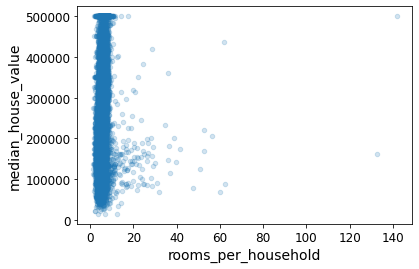

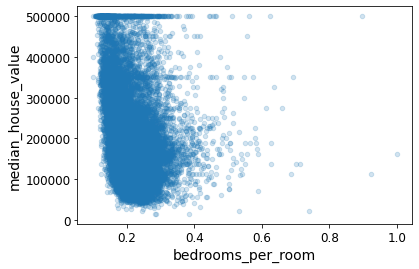

In [30]:
# rooms_per_household와 타겟과의 관계를 확인
train_copy.plot(kind='scatter', x='rooms_per_household', y='median_house_value',
                alpha=0.2)

# bedrooms_per_room와 타겟과의 관계를 확인
train_copy.plot(kind='scatter', x='bedrooms_per_room', y='median_house_value',
                alpha=0.2)

In [31]:
# 파생변수를 포함한 데이터 셋 확인
train_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## 머신러닝 알고리즘을 위한 데이터 준비 (전처리)

In [32]:
# 타겟인 median_house_value를 y로, 나머지를 X로 분리
X_train_set = strat_train_set_full.drop('median_house_value', axis=1)
y_train_set = strat_train_set_full['median_house_value'].copy()

In [33]:
# X_train_set에서 어떤 변수이든 null값이 있는 데이터를 확인
sample_incomplete_rows = X_train_set[X_train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [34]:
# total_bedrooms의 값이 null인 경우 해당 관측치를 drop하는 방법
sample_incomplete_rows.dropna(subset=['total_bedrooms'], axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
# null값을 중간값으로 대체하는 방법
median = df_housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,435.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,435.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,435.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,435.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,435.0,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
# sklearn의 SimpleImputer를 사용해 대체하기 위해 객체를 생성
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# '''
# starategy에는 median외에 mean, most_frequent, constant(fill_value=)를 지정할 수 있다.
# '''

In [37]:
# object type에는 median을 적용할 수 없으므로, ocean_proximity 변수를 제외
X_train_set_num = X_train_set.drop('ocean_proximity', axis=1)

# 아래와 같이 dtype이 np.number에 속하는 데이터만 추출 가능
# X_train_set_num = X_train_set.select_dtype(include=[np.number])

In [38]:
# imputer 객체에 데이터를 학습
imputer.fit(X_train_set_num)

SimpleImputer(strategy='median')

In [39]:
# statistics_ 속성으로 imputer 객체의 정보 확인
imputer.statistics_

# '''
# sklearn의 객체가 학습을 통해 얻은 값은 _가 붙은 속성에 저장되어 있다.
# '''

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
# transform 메서드로 imputer 객체에서 null값을 대체
X = imputer.transform(X_train_set_num)

X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [41]:
# transform한 데이터 셋을 Dataframe으로 변환
X_train_set_imputed = pd.DataFrame(X, columns=X_train_set_num.columns,
                              index=X_train_set_num.index)

In [42]:
# 결측치가 있던 관측치의 index를 이용해 impute가 잘 됐는지 확인
X_train_set_imputed.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [43]:
# 범주형 특성인 ocean_proximity 변수를 전처리하기 위해 호출
X_train_set_cat = X_train_set[['ocean_proximity']]

# 인덱싱 처럼 대괄호를 하나만 사용하면 시리즈가 되기 때문에, 2개를 사용해서 슬라이싱처럼 사용
print(type(X_train_set_cat))

# 데이터 확인
X_train_set_cat.head(10)

<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [44]:
# sklearn의 OrdinalEncoder로 인코딩
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_set_cat)

# 인코딩 여부 확인
X_train_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [45]:
# 인코더 객체의 정보 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
# sklearn의 OneHotEncoder로 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=True)
X_train_cat_onehot = onehot_encoder.fit_transform(X_train_set_cat)

# 원핫인코딩 여부 확인
X_train_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
# toarray메서드로 희소행렬을 밀집행렬로 표현
X_train_cat_onehot.toarray()

# '''
# OneHotEncoder 객체 생성시 sparse 매개변수를 Flase로 변경하면, 희소행렬로 만들지 않음.
# '''

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
# sklearn에 있는 기능을 통해, 유용하다고 생각했던 파생변수를 추가
from sklearn.base import BaseEstimator, TransformerMixin

# 구현할 클래스가 ndarray를 return할 것이기 때문에, 열의 인덱스를 미리 확인하고 지정
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 사용자 정의 클래스를 정의
# BaseEstimator는 기본적인 Estimator로, 상속해야 GridSearchCV 등에 사용 가능
# TransformerMixin은 변환기의 여러 유용한 기능을 가지고 있으므로, 상속해서 사용
class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    # 필요 시 add_bedrooms_per_room 변수는 추가하지 않을 수 있도록 파라미터로 설계
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
        pass # init
    # 상속을 위해 구현하나, 수행하는 기능은 없는 메서드로 설계
    def fit(self, X, y=None) :
        return self
    # 파생변수를 추가하는 transform 메서드를 구현, add_bedrooms_per_room은 조건에 따라 추가되도록 설계
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
    pass # end class

# 사용자 정의 클래스로부터 변환기 인스턴스 생성
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# 변환기를 사용해 파생변수를 포함한 ndarray 생성
extra_attribs = attr_adder.transform(X_train_set.to_numpy())

In [49]:
# 파생변수를 포함한 ndarry를 데이터 프레임으로 형변환
X_train_plus_extra = pd.DataFrame(
    extra_attribs,
    columns=list(X_train_set.columns)+['rooms_per_household', 'population_per_household'],
    index=X_train_set.index)

# 데이터 프레임 확인
X_train_plus_extra.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [50]:
# 수치형 특성에 대한 Pipeline을 설계
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# null 값을 median으로 처리하는 imputer를 구축
# 파생변수를 추가하는 attribs_adder를 구축
# Scaling을 수행하는 std_scaler를 구축
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# pipeline 객체로  데이터 셋 생성
X_train_num_tr = num_pipeline.fit_transform(X_train_set_num)

# 데이터 셋 확인
X_train_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [51]:
# 수치형과 문자형 데이터 셋을 결합하기 위해 각 컬럼별로 다른 변환기를 적용
# sklearn의 ColumnTransformer를 사용
from sklearn.compose import ColumnTransformer

# 각기 다르게 적용할 컬럼을 구분하여 변수로 저장
num_attribs = list(X_train_set_num)
cat_attribs = ['ocean_proximity']

# 각 컬럼에 맞는 변환기를 적용한 1개의 파이프 라인으로 구축
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# 모든 파이프 라인을 통과한 데이터 셋 생성
X_train = full_pipeline.fit_transform(X_train_set)

# 데이터 셋 확인
X_train

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
X_train.shape

(16512, 16)

## 모델 선택과 훈련

In [53]:
# 선형회귀인 LinearRegression을 사용해 학습
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_set)

LinearRegression()

In [54]:
# 원천 데이터에서 샘플 데이터를 추출
some_data = X_train_set.iloc[:5]
some_labels = y_train_set.iloc[:5]

# 원천 데이터를 파이프라인에 통과시켜 데이터 전처리 수행
some_data_prepared = full_pipeline.transform(some_data)

# 학습시킨 모델이 예측한 값을 확인
print('예측 :', lin_reg.predict(some_data_prepared))

# 실제 값을 확인
print('레이블 :', list(some_labels))

예측 : [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
# mse값 확인을 위한 sklearn의 도구 임포트
from sklearn.metrics import mean_squared_error

# 학습한 데이터에 대한 예측 수행
housing_predictions = lin_reg.predict(X_train)

# sklearn의 도구를 통해 mse값 저장
lin_mse = mean_squared_error(y_train_set, housing_predictions)

# mse 값을 제곱근하여 rmse값 저장
lin_rmse = np.sqrt(lin_mse)

# rmse값 확인
lin_rmse

# '''
# 평균적으로 68628$ 만큼의 오차가 있다는 의미임.
# 타겟 값이 12만 ~ 24만정도 인데, 이정도 오차가 있다는 것은 좋지 않은 모델이라는 의미임.
# '''

68628.19819848923

In [56]:
# 평균 절대값 오차(mae) 확인을 위한 sklearn의 도구 임포트
from sklearn.metrics import mean_absolute_error

# sklearn의 도구를 통해 mae값 저장
lin_mae = mean_absolute_error(y_train_set, housing_predictions)

# mae값 확인
lin_mae

49439.895990018966

In [57]:
# 결정계수(R square) 확인을 위한 score메서드 활용
lin_reg.score(X_train, y_train_set)

# '''
# 결정계수는 1에 가까울 수록 좋으며, 0에 가까울 수록 평균으로 예측한 것과 동일해짐.
# .64는 좋은 수치가 아니며, 과소적합이라 판단할 수 있음.
# '''

0.6481624842804428

In [58]:
# 전통적으로 성능이 좋은 DecisionTreeRegressor을 사용
from sklearn.tree import DecisionTreeRegressor

# 객체 생성 및 학습
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train_set)

DecisionTreeRegressor(random_state=42)

In [59]:
# tree_reg 모델로 예측
housing_predictions = tree_reg.predict(X_train)

# mse 값으로 rmse 값 저장
tree_mse = mean_squared_error(y_train_set, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

# rmse 값 확인
tree_rmse

# '''
# 타겟에 대한 오차가 0라는 의미는, 과대적합으로 판단할 수 있음.
# '''

0.0

In [60]:
# 마찬가지로 결정계수도 1로 나오므로, 과대적합
tree_reg.score(X_train, y_train_set)

# '''
# test_set을 사용하지 않는 이유는 분석가가 test_set에 맞도록 설계하는 등의 간접적 영향 때문임.
# 검증용 데이터 셋을 미리 분리해놓는다면, 이 문제를 해결할 수 있음.
# '''

1.0

## 모델 세부 튜닝

In [61]:
# 교차검증(k-fold cross validation)을 통한 모델의 성능 확인
from sklearn.model_selection import cross_val_score

# socring의 디폴트는 결정계수이나, rmse를 확인하기 위해 파라미터에 값 전달
# neg는 네거티브의 의미로, mse값을 음수로 표현 (큰 값이 좋은 값으로 인식되도록 설계됨.)
scores = cross_val_score(tree_reg, X_train, y_train_set,
                        scoring='neg_mean_squared_error', cv=10)

# neg값을 양수로 변경해 rmse값 저장
tree_rmse_scores = np.sqrt(-scores)

In [63]:
# scores값을 확인하기 위한 함수 생성
def display_scores(scores) :
    print('점수 :', scores)
    print('평균 :', scores.mean())
    print('표준 편차 :', scores.std())
    pass # display_scores

# 값 출력
display_scores(tree_rmse_scores)

# '''
# 이 모델은 평균 7만$ 오차가 있는 모델로, 아까의 결과는 과대적합이라는 의미가 됨.
# '''

점수 : [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균 : 71407.68766037929
표준 편차 : 2439.4345041191004


In [64]:
# lin_reg모델의 성능 검증 
lin_scores = cross_val_score(lin_reg, X_train, y_train_set,
                            scoring='neg_mean_squared_error', cv=10)

# rmse 값 저장
lin_rmse_scores = np.sqrt(-lin_scores)

# socres 확인
display_scores(lin_rmse_scores)

# '''
# tree_reg 모델과 큰 차이가 없음.
# '''

점수 : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 : 69052.46136345083
표준 편차 : 2731.6740017983425


In [65]:
# RandomForestRegressor를 통한 학습
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train_set)

RandomForestRegressor(random_state=42)

In [66]:
# RandomForestRegressor 모델의 rmse 값 확인
housing_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train_set, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [67]:
# 교차 검증을 통한 모델의 성능 확인
forest_scores = cross_val_score(forest_reg, X_train, y_train_set,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# '''
# 평균 5만$의 오차가 있는 모델임.
# '''

점수 : [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균 : 50182.303100336096
표준 편차 : 2097.0810550985693


In [68]:
# SoftVectorMachine을 통한 학습과 rmse값 확인
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train_set)
housing_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train_set, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [69]:
# 모델의 하이퍼파라미터를 조정하기 위해 GridSearchCV 사용
from sklearn.model_selection import GridSearchCV

# RandomForest 모델에 적용할 하이퍼 파라미터를 저장
# 첫 번째 탐색 방법은 3*4의 조합으로 총 12번 시도
# 두 번째 탐색 방법은 2*3의 조합으로 총 6번 시도
param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]},
]

# RandomForest 모델 생성
forest_reg = RandomForestRegressor(random_state=42)

# param_grid의 하이퍼 파라미터의 RandomForest 모델을 5번의 교차검증을 하는 객체 생성
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

# grid_search 객체는 (12 + 6) * 5번으로 총 90번의 학습을 수행
grid_search.fit(X_train, y_train_set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
# 최상의 파라미터 조합 확인
print(grid_search.best_params_)

# 최상의 학습 모델 확인
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [71]:
# 학습간 발생한 정보 확인
grid_search.cv_results_

{'mean_fit_time': array([0.07475982, 0.22929459, 0.70522537, 0.11534796, 0.38047605,
        1.13267541, 0.15052471, 0.52480226, 1.56781759, 0.19941273,
        0.67136641, 2.02292852, 0.10858402, 0.36607432, 0.14175196,
        0.48174186, 0.18244414, 0.59995351]),
 'std_fit_time': array([0.0126905 , 0.00302994, 0.03074077, 0.00145148, 0.00872732,
        0.01994857, 0.00425098, 0.00736867, 0.02094505, 0.00519177,
        0.01933936, 0.02721941, 0.00394171, 0.01441473, 0.00518172,
        0.01657656, 0.00744061, 0.00905475]),
 'mean_score_time': array([0.0041142 , 0.01198792, 0.03154244, 0.0039113 , 0.01040244,
        0.03315873, 0.0040658 , 0.01212716, 0.03009057, 0.00429654,
        0.01090031, 0.03022304, 0.00453343, 0.01328211, 0.00441384,
        0.01320395, 0.00508676, 0.01181521]),
 'std_score_time': array([0.00053262, 0.00254175, 0.00505671, 0.00026694, 0.00037969,
        0.00452612, 0.00056368, 0.00203301, 0.00278144, 0.00060439,
        0.00081927, 0.00321703, 0.0003611 , 

In [72]:
# 학습간 발생한 오차 확인
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [73]:
# 하이퍼 파라미터 튜닝을 위한 RandomizedSearchCV 사용
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 하이퍼 파라미터의 값이 연속적이므로 randint를 통해 random한 값을 전달
param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8),
}

# GridSearch와 다르게, n_iter에 따라, 학습을 수행하는 횟수가 가변적
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error',
                               random_state=42)
rnd_search.fit(X_train, y_train_set)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f69da5518d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f69da551f60>},
                   random_state=42, scoring='neg_mean_squared_error')

In [74]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [75]:
# Tree 기반 예측기의 기능으로 특성의 중요도 확인
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [76]:
# 파생변수명 저장
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

# pipeline내에서 카테고리 변수에 적용했던 encoder 저장
cat_encoder = full_pipeline.named_transformers_['cat']

# 인코딩 한 카테고리 변수의 카테고리를 리스트로 저장
# 여러 변수가 있었다면, 변수별로 카테고리를 확인했어야 했으나, 1개였므로 0으로 인덱싱
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# 모두를 합해 변수 리스트를 저장
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# sort와 zip을 통해 중요도별로 표시
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [77]:
# grid_search 객체를 최종 모델로 저장
final_model = grid_search.best_estimator_

# 분리해놓은 test셋에서 X와 y를 분리
X_test = strat_test_set_full.drop('median_house_value', axis=1)
y_test = strat_test_set_full['median_house_value'].copy()

# X_test를 pipeline에 통과시켜 저장 (train과 동일하게 수행되도록 fit은 수행하지 않음.)
X_test_prepared = full_pipeline.transform(X_test)

# 예측 및 평가
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# '''
# 평균 4.7만$의 오차가 있는 모델임.
# '''

47730.22690385927

In [78]:
# RMSE에 대한 95% 신뢰구간 계산
from scipy import stats

confidence = .95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

# '''
# 95% 신뢰구간 내에서 예측 결과는 4.5~4.9만$의 오차가 있을 수 있음.
# '''

array([45685.10470776, 49691.25001878])

## 추가정보

In [80]:
# 전처리와 예측을 포함한 전체 파이프라인 구축
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

# 전체 파이프라인 학습
# full_pipeline_with_predictor.fit(X_train, y_train_set)

# predict 메서드를 사용하면 transform이후에 estimator로 predict를 수행
# full_pipeline_with_predictor.predict(some_data)

In [81]:
# joblib를 사용한 모델 저장
import joblib
my_model = full_pipeline_with_predictor

# 모델 객체를 로컬에 pkl파일로 저장
joblib.dump(my_model, 'my_model.pkl')

# 로컬에 저장된 pkl파일을 모델 객체로 로드
my_model_loaded = joblib.load('my_model.pkl')